In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
! pip install  scikit-learn==0.23.1

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~klearn\\metrics\\cluster\\_expected_mutual_info_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import sklearn
sklearn.__version__

'0.23.2'

In [7]:
df = pd.read_csv("ANN_Quiz_Data_Breast_Cancer.csv")

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
y = df.Target
x = df.drop(['Target'], axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=0)

In [16]:
clf = MLPClassifier(hidden_layer_sizes=500, max_iter=200,
                     solver='sgd', verbose=True,  random_state=21,tol=0.0001)

In [17]:
clf.fit(x_train, y_train)

Iteration 1, loss = 17.26928631
Iteration 2, loss = 5.44137609
Iteration 3, loss = 0.39961550
Iteration 4, loss = 0.72699953
Iteration 5, loss = 0.94449587
Iteration 6, loss = 0.43642757
Iteration 7, loss = 0.39134573
Iteration 8, loss = 0.39896403
Iteration 9, loss = 1.14524619
Iteration 10, loss = 0.45724976
Iteration 11, loss = 0.42506580
Iteration 12, loss = 0.66909200
Iteration 13, loss = 0.49862392
Iteration 14, loss = 0.43065011
Iteration 15, loss = 0.67477773
Iteration 16, loss = 0.96738485
Iteration 17, loss = 0.57326767
Iteration 18, loss = 0.48629687
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=500, random_state=21, solver='sgd',
              verbose=True)

In [18]:
y_pred = clf.predict(x_train)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
clf.score(x_train,y_train)

0.6417582417582418

In [21]:
 from sklearn.metrics import accuracy_score

In [24]:
confusion_matrix(y_train,y_pred)

array([[163,   2],
       [161, 129]], dtype=int64)

In [26]:
clf.score(x_train,y_train)

0.6417582417582418

AUC: 0.963


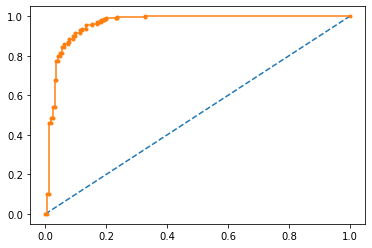

In [27]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [28]:
y_pred = clf.predict(x_test)

In [29]:
clf.score(x_test,y_test)

0.6403508771929824

AUC: 0.942


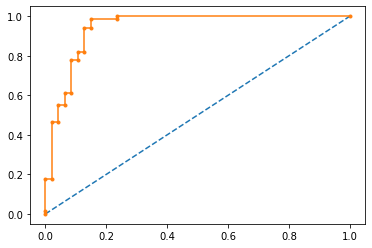

In [30]:
# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69        47
           1       0.96      0.40      0.57        67

    accuracy                           0.64       114
   macro avg       0.75      0.69      0.63       114
weighted avg       0.79      0.64      0.62       114

